## Clustering 📦📦📦

#### Import the libraries

In [ ]:
# !pip install -U scikit-learn

In [1]:
import numpy as np
import pandas as pd
#scikit is an open source data analysis library, and the gold standard for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1. Read the data

In [2]:
df = pd.read_csv('../data/penguins_cluster.csv')
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
301,Gentoo,47.2,13.7,214.0,4925.0
302,Gentoo,46.8,14.3,215.0,4850.0
303,Gentoo,50.4,15.7,222.0,5750.0
304,Gentoo,45.2,14.8,212.0,5200.0


#### 2. Show the first 10 rows of the data

In [3]:
df.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0
5,Adelie,38.9,17.8,181.0,3625.0
6,Adelie,39.2,19.6,195.0,4675.0
7,Adelie,41.1,17.6,182.0,3200.0
8,Adelie,38.6,21.2,191.0,3800.0
9,Adelie,34.6,21.1,198.0,4400.0


In [4]:
# Let's check the unique species we have in our data
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df[df['species']== 'Adelie'].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,124.000000,124.000000,124.000000,124.000000
mean,38.114516,18.170968,188.741935,3606.451613
std,2.145128,1.159112,5.787386,408.035037
min,32.100000,15.500000,172.000000,2850.000000
25%,36.475000,17.200000,185.000000,3325.000000
50%,38.150000,18.100000,189.500000,3550.000000
75%,39.700000,18.900000,193.000000,3881.250000
max,42.200000,21.200000,202.000000,4675.000000


#### 3. We are going work with the numerical data. Filter out the species column, name the dataset df_num and show the dataset.

In [6]:
df_num = df[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [ ]:
# We can also drop the column
#df.drop('species', inplace=True, axis =1)

#### 4. Use the `describe()` function to see if the variables in the data set have large differences between their ranges.

In [7]:
df_num.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,306.000000,306.000000,306.000000,306.000000
mean,44.104575,17.012745,201.444444,4217.810458
std,5.677102,1.942248,14.397354,827.289041
min,32.100000,13.100000,172.000000,2700.000000
25%,39.000000,15.300000,190.000000,3550.000000
50%,45.200000,17.200000,198.000000,3950.000000
75%,49.000000,18.600000,214.000000,4850.000000
max,59.600000,21.200000,231.000000,6300.000000


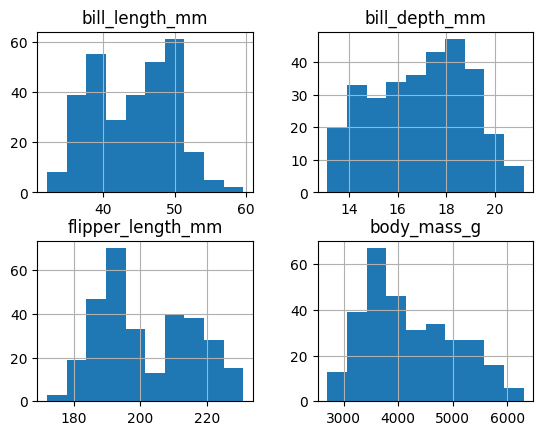

In [8]:
df_num.hist();

#### 5. Do you see any large difference? If yes which features? 

Body mass has way higher order of magnitude than dimension measures. Also flippers are longer than bills.

#### 6. If you think one or more features may dominate over the other ones, you need to standardize the data. Name the scaled data as penguins_scaled.

**Feature Scaling is an important technique that mostly comes to the picture during pre-processing step in Machine Learning.**
 
We use feature scaling when the variables in the data set have large differences in order of magnitude, or when they are similar in that sense but measured with different metrics such as meters vs kilometers, etc. 
These differences cause problems for many models. For example, if one of the features has a way higher order of magnitude, this particular feature will dominate over the other ones.

In order to avoid this issue, we will perform feature scaling which brings all of the measurements into a similar range of values. There are different approaches to feature scaling:
- normalization - it maps the data in the range between 0 and 1 (the minimal data point will be mapped to 0 and the maximal one to 1). Note that if the data consist of any outliers it will influence the new distribution heavily.
- standarization - it maps the data in a way that all the new values will oscilate around 0 with a unit standard deviation. In this case, the mapped values are not restricted to a particular range. Standarization is widely used when the data has a gaussian distribution.

Imagine you have a 2 dimensional dataset representing the body measurements of a group of adult people: height in meters and weight in kg. The height ranges respectively from 1 to 2 and weight from 40 to 200. It does not matter which model you use on this dataset, the weight feature will dominate over the height and it will contribute more to the computation.  

In python we can use scikit-learn to scale the data.

In [9]:
scaler = StandardScaler()
scaler.fit(df_num)
df_num_scaled = scaler.transform(df_num)
df_num_scaled

#Normalization: X_new = (X - X_min)/(X_max - X_min)
#Standardization: X_new = (X - mean)/Std


array([[-0.88298091,  0.87013517, -1.42234005, -0.56640027],
       [-0.81240701,  0.19971144, -1.07448514, -0.5058629 ],
       [-0.67125922,  0.50913778, -0.44834632, -1.17177393],
       ...,
       [ 1.11073163, -0.67699651,  1.43007016,  1.85509441],
       [ 0.19327099, -1.14113601,  0.73436035,  1.18918337],
       [ 1.02251426, -0.47071228,  0.80393133,  1.43133284]])

#### 7. The standardized data is an array. Please convert the array to a pandas dataframe, Name the data df_penguins. (Hint: columns = df_num.columns) 

In [10]:
df_penguins = pd.DataFrame(df_num_scaled, columns=df_num.columns)
df_penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.882981,0.870135,-1.422340,-0.566400
1,-0.812407,0.199711,-1.074485,-0.505863
2,-0.671259,0.509138,-0.448346,-1.171774
3,-1.306424,1.179561,-0.587488,-0.929624
4,-0.847694,1.849985,-0.796201,-0.687475


#### 8. Check how does the scaled data look like.

In [11]:
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02
mean,1.857628e-16,-1.300340e-15,-9.752547e-16,1.393221e-16
std,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00
min,-2.118024e+00,-2.017844e+00,-2.048479e+00,-1.837685e+00
25%,-9.006244e-01,-8.832807e-01,-7.962012e-01,-8.085497e-01
50%,1.932710e-01,9.656933e-02,-2.396334e-01,-3.242508e-01
75%,8.637230e-01,8.185641e-01,8.735023e-01,7.654218e-01
max,2.733931e+00,2.159412e+00,2.056209e+00,2.521005e+00


#### Check the distribution again

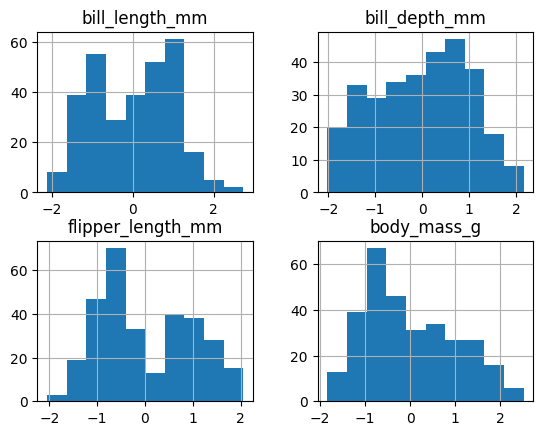

In [12]:
df_penguins.hist();

# 9. Let's imagine that we don't know anything about the data and we assume there might be only two groups of penguins.

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42) #Attention!
kmeans.fit(df_penguins)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Since we are not sure about how many clusters we should have, 
# we may need to generate the same labels again and again. Therefore using random state is a good idea
# But what is 42?

Checking the inertia

In [14]:
kmeans.inertia_  # passivity, inaction
#sum of squared distance of samples to their closest cluster center

487.40130957014276

#### 10. Let's check which labels we have

In [15]:
# assign a cluster to each example
clusters = kmeans.predict(df_penguins)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
# retrieve unique clusters
labels = np.unique(clusters)
labels

array([0, 1], dtype=int32)

In [17]:
#How many penguins in which cluster?
#clusters = kmeans.predict(df_penguins)

pd.Series(clusters).value_counts().sort_index()

0    187
1    119
Name: count, dtype: int64

#### 11. Now we are adding the defined clusters to the dataframe

In [18]:
df_clustered = df_penguins.copy() 
df_clustered["cluster"] = clusters
df_clustered

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,-0.882981,0.870135,-1.422340,-0.566400,0
1,-0.812407,0.199711,-1.074485,-0.505863,0
2,-0.671259,0.509138,-0.448346,-1.171774,0
3,-1.306424,1.179561,-0.587488,-0.929624,0
4,-0.847694,1.849985,-0.796201,-0.687475,0
...,...,...,...,...,...
301,0.546140,-1.708418,0.873502,0.856228,1
302,0.475567,-1.398991,0.943073,0.765422,1
303,1.110732,-0.676997,1.430070,1.855094,1
304,0.193271,-1.141136,0.734360,1.189183,1


In [19]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     306 non-null    float64
 1   bill_depth_mm      306 non-null    float64
 2   flipper_length_mm  306 non-null    float64
 3   body_mass_g        306 non-null    float64
 4   cluster            306 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 10.9 KB


#### 12. Add real penguins species to the dataframe again 

In [20]:
df_clustered['species'] = df[['species']]
df_clustered

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster,species
0,-0.882981,0.870135,-1.422340,-0.566400,0,Adelie
1,-0.812407,0.199711,-1.074485,-0.505863,0,Adelie
2,-0.671259,0.509138,-0.448346,-1.171774,0,Adelie
3,-1.306424,1.179561,-0.587488,-0.929624,0,Adelie
4,-0.847694,1.849985,-0.796201,-0.687475,0,Adelie
...,...,...,...,...,...,...
301,0.546140,-1.708418,0.873502,0.856228,1,Gentoo
302,0.475567,-1.398991,0.943073,0.765422,1,Gentoo
303,1.110732,-0.676997,1.430070,1.855094,1,Gentoo
304,0.193271,-1.141136,0.734360,1.189183,1,Gentoo


#### 13. Let's check the mapping between the species and clusters

In [21]:
adelie = df_clustered.loc[df_clustered['species'] == 'Adelie']

In [22]:
adelie['cluster'].unique() # which label got Adelie?

array([0], dtype=int32)

In [23]:
gentoo = df_clustered.loc[df_clustered['species'] == 'Gentoo']
gentoo['cluster'].unique()

array([1], dtype=int32)

In [24]:
chinstrap = df_clustered[df_clustered['species'] == 'Chinstrap']
chinstrap['cluster'].unique() # chinstrap and adelie got the same 

array([0], dtype=int32)

#### 14. Let's use elbow method to see how many clusters are recommended for this dataset (we know that there are 3 species in the dataset)

**The Elbow Method**

The elbow method is one of the most well-known methods in machine learning and could be also used for finding the optimal number of clusters. With calculating the **Within-Cluster-Sum of Squared Errors ([WSS](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb))** for different values of k we can choose the k for which WSS first starts to decrease. In a plot this will show an elbow joint.


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

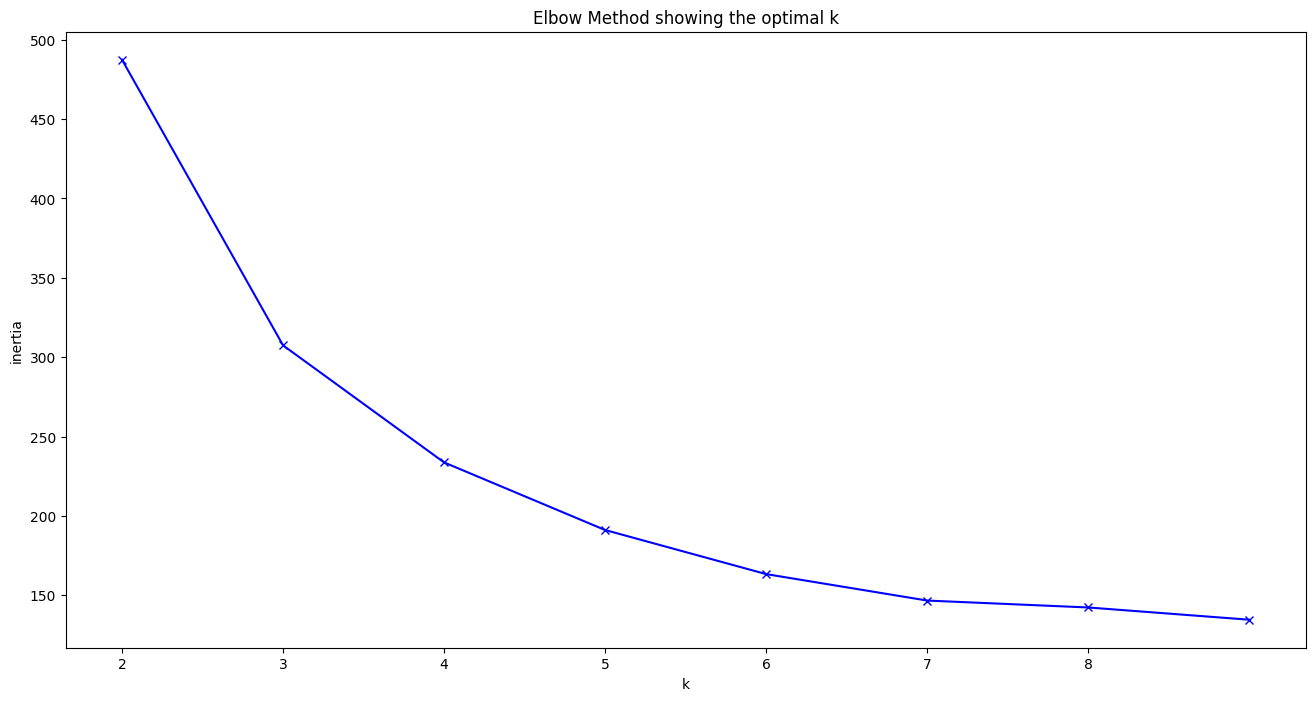

In [25]:
K = range(2, 10) #let's give it a range
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234) # a different random state
    kmeans.fit(df_penguins)
    inertia.append(kmeans.inertia_) #Inertia measures how well a dataset was clustered by K-Means

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # shows the x symbols on the graph
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k')

We can see a light elbow for k = 3 which fits our knowledge of the dataset.

#### 15. Repeat k-means clustering with k = 3

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_penguins)

clusters = kmeans.predict(df_penguins)
df_clustered_3 = df_penguins.copy() 
df_clustered_3["cluster"] = clusters
df_clustered_3

#labels = np.unique(labels)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,-0.882981,0.870135,-1.422340,-0.566400,2
1,-0.812407,0.199711,-1.074485,-0.505863,2
2,-0.671259,0.509138,-0.448346,-1.171774,2
3,-1.306424,1.179561,-0.587488,-0.929624,2
4,-0.847694,1.849985,-0.796201,-0.687475,2
...,...,...,...,...,...
301,0.546140,-1.708418,0.873502,0.856228,1
302,0.475567,-1.398991,0.943073,0.765422,1
303,1.110732,-0.676997,1.430070,1.855094,1
304,0.193271,-1.141136,0.734360,1.189183,1


In [27]:
df_clustered_3['species'] = df[['species']]
df_clustered_3

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster,species
0,-0.882981,0.870135,-1.422340,-0.566400,2,Adelie
1,-0.812407,0.199711,-1.074485,-0.505863,2,Adelie
2,-0.671259,0.509138,-0.448346,-1.171774,2,Adelie
3,-1.306424,1.179561,-0.587488,-0.929624,2,Adelie
4,-0.847694,1.849985,-0.796201,-0.687475,2,Adelie
...,...,...,...,...,...,...
301,0.546140,-1.708418,0.873502,0.856228,1,Gentoo
302,0.475567,-1.398991,0.943073,0.765422,1,Gentoo
303,1.110732,-0.676997,1.430070,1.855094,1,Gentoo
304,0.193271,-1.141136,0.734360,1.189183,1,Gentoo


In [34]:
adelie_3 = df_clustered_3.loc[df_clustered_3['species'] == 'Adelie']
adelie_3['cluster'].unique() # which label got Adelie?

array([2], dtype=int32)

In [32]:
gentoo_3 = df_clustered_3.loc[df_clustered_3['species'] == 'Gentoo']
gentoo_3['cluster'].unique()

array([1], dtype=int32)

In [33]:
chinstrap_3 = df_clustered_3.loc[df_clustered_3['species'] == 'Chinstrap']
chinstrap_3['cluster'].unique() 

array([0], dtype=int32)

### Let's build our penguin species finder

#### Notes to the teacher:
This part is optional. The idea is to show where we can use clustering in a simple penguin game. Depending on the level, this part can be used, otherwise please skip

#### 16. The function below is prepared to give you the correct penguin species according to the body mass input you give. Until this point if you followed the instructions correctly and named the dataframes as requested, your species finder should be working without any problem. The function basically gets the input from the user, converts it to a dataframe, standardize the data fitting the same scale you used above, predicting the cluster and giving the name of the species from the same cluster. Enjoy!

In [35]:
from PIL import Image

tell me your penguin's bill_length in mm (between 32-60 mm ):  65
tell me your penguin's bill_depth in mm (between 13-21 mm):  7
tell me your penguin's flipper length in mm (between 172-230 mm ):  300
tell me your penguin's body mass in gram (between 2700-6300 g):  7000


your penguin is a adelie!


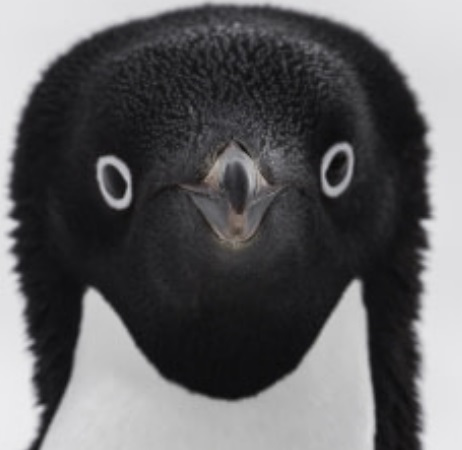

In [37]:
def penguin_find():
    bill = int(input("tell me your penguin's bill_length in mm (between 32-60 mm ): " ))
    bill_d = int(input("tell me your penguin's bill_depth in mm (between 13-21 mm): " ))
    flipper = int(input("tell me your penguin's flipper length in mm (between 172-230 mm ): "))
    mass = int(input("tell me your penguin's body mass in gram (between 2700-6300 g): "))
    penguins = {'bill_length_mm': bill, 'bill_depth_mm': bill_d, 'flipper_length_mm': flipper, 'body_mass_g': mass}
    penguins_df = pd.DataFrame(penguins, index=['0'])
    p_scaled = scaler.transform(penguins_df)
    p_scaled_df = pd.DataFrame(p_scaled, columns = penguins_df.columns)
    cluster1 = kmeans.predict(p_scaled_df)
    cluster2 = cluster1[0]
    if cluster2 == 0 :
        print ("your penguin is a gentoo!")
        im_gentoo = Image.open(r"./pinguin_pic/gentoo.jpg") #creates an object
        display(im_gentoo)
    elif cluster2 == 1 :
        print ("your penguin is a adelie!")
        im_adelie = Image.open(r"./pinguin_pic/adelie.jpg") #creates an object
        display(im_adelie)
    else :
        print ("your penguin is a chinstrap!")
        im_chinstrap = Image.open(r"./pinguin_pic/chinstrap.jpg") #creates an object
        display(im_chinstrap)
penguin_find()